## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
start = timeit.default_timer()

## Data Preprocess

### A breif introduction of Dataset
The dataset has download from Kaggle. The dataset is about Life Expectancy which mean what could be average life expectancy of the country people with the given variables details. Here dependent variable is Life expectancy and rest of the other variable is dependent variable.

In [2]:
data = pd.read_csv('Regression.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head(3)

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9


### Data Cleaning
Here i have clnned the with the help pandas library. I have feel all the null value by mean of the column.

In [5]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
dtype: int64

In [6]:
df.fillna(value = df.mean(), inplace = True)

In [7]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
dtype: int64

### Correlation Coefficients
Correlation coefficients are used to measure the strength of the relationship between two variables. This measures the strength and direction of a linear relationship between two variables. Values always range between -1 (strong negative relationship) and +1 (strong positive relationship).

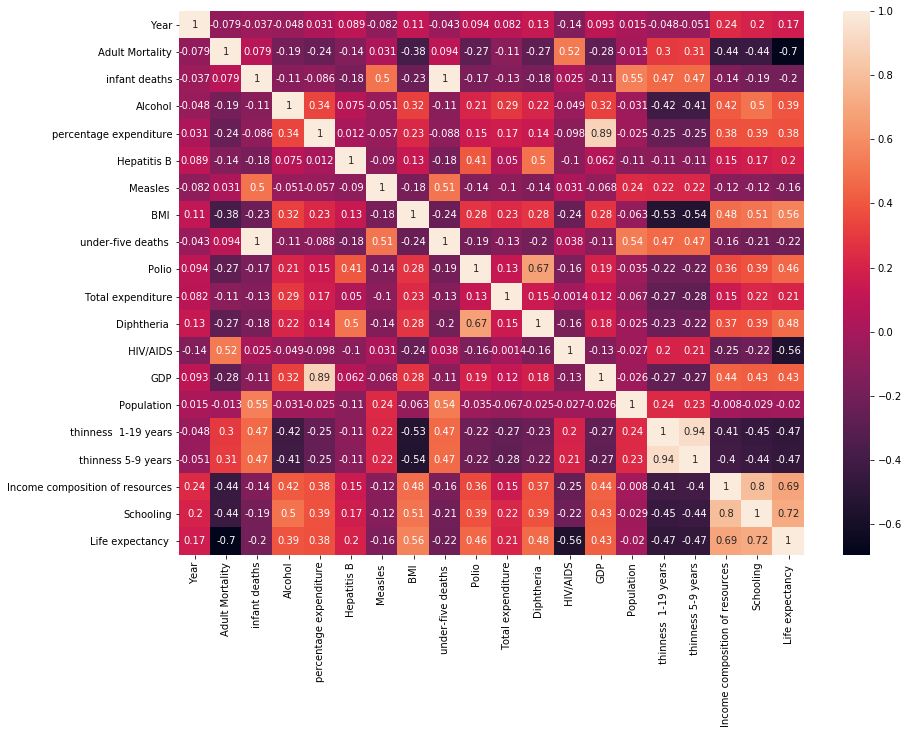

In [8]:
plt.figure(figsize = (14, 10))
sns.heatmap(df.corr(), annot = True)

### Drop Column
I have drop the column which is not affecting the dependent variable, i have found with help of correlation coefficient and its graph, which i have drawn with help of seaborn library

In [9]:
df = df.drop(['Country','Status','Year','infant deaths', 'Hepatitis B','Measles ','under-five deaths ', 'Total expenditure', 'Population'], axis = 1)

In [10]:
df.head(1)

,Adult Mortality,Alcohol,percentage expenditure,BMI,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,263.0,0.01,71.279624,19.1,6.0,65.0,0.1,584.25921,17.2,17.3,0.479,10.1,65.0


In [11]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
reshape_y = np.reshape(y,(2938,1))
print(y)

[65.  59.9 59.9 ... 44.8 45.3 46. ]


### MinMaxScaler
Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.(Scikit-learn)

In [12]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x)

In [13]:
x

array([[0.36288089, 0.        , 0.00365913, ..., 0.60350877, 0.50527426,
        0.48792271],
       [0.37396122, 0.        , 0.00377433, ..., 0.61052632, 0.5021097 ,
        0.48309179],
       [0.36980609, 0.        , 0.00375871, ..., 0.61754386, 0.49578059,
        0.47826087],
       ...,
       [0.09972299, 0.2474804 , 0.        , ..., 0.04210526, 0.45042194,
        0.48309179],
       [0.94875346, 0.09574468, 0.        , ..., 0.05614035, 0.45042194,
        0.47342995],
       [0.91966759, 0.09350504, 0.        , ..., 0.38947368, 0.45780591,
        0.47342995]])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,reshape_y,test_size=0.33)

## Import Machine Learning Model

### Support Vector Machine

In [15]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, reshape_y)
y_predsvm = regressor.predict(X_test)
stop = timeit.default_timer()
print('Time :', stop-start)

C:\Users\Nizam\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Time : 3.5660769


In [16]:
SVR()

SVR()

### Machine Learning Model Prediction Score
To predict how much my model working accuratly I have use r-square to find its accuracy score.

In [17]:
from sklearn.metrics import r2_score
svmscore = r2_score(y_test, y_predsvm)

In [18]:
print('Model Score SVM :',svmscore)

Model Score SVM : 0.8622849252807305
